# Validate DiffprofPop against Monte Carlo realization

This notebook gives a visualization of the unit test in `diffprof/tests/test_mc_diffprofpop.py`

In [1]:
from jax import random as jran

import numpy as np
from jax import random as jran
from diffprof.mc_diffprofpop import mc_halo_population_singlemass
from diffprof.diffprofpop import get_singlemass_params_p50
from diffprof.dpp_opt import get_u_param_grids
from diffprof.dpp_predictions import get_predictions_from_singlemass_params_p50

In [2]:
ran_key = jran.PRNGKey(0)
n_t = 30
tarr = np.linspace(1, 13.8, n_t)

lgm0 = 14.0
singlemass_dpp_params = get_singlemass_params_p50(lgm0)

p50_arr = np.linspace(0, 1, 50)
u_param_grids = get_u_param_grids(ran_key, 300)
u_be_grid, u_lgtc_bl_grid = u_param_grids
args = (singlemass_dpp_params, tarr, p50_arr, u_be_grid, u_lgtc_bl_grid)
dpp_preds = get_predictions_from_singlemass_params_p50(*args)
avg_log_conc_p50_dpp = dpp_preds[0]


In [3]:
n_p = 400
zz = np.zeros(n_p)

ip = 0
lgc_sample = mc_halo_population_singlemass(
    ran_key, tarr, zz + p50_arr[ip], singlemass_dpp_params
)
avg_log_conc_p50_mc_dpp0 = np.mean(lgc_sample, axis=0)

ip = -1
lgc_sample = mc_halo_population_singlemass(
    ran_key, tarr, zz + p50_arr[ip], singlemass_dpp_params
)
avg_log_conc_p50_mc_dpp1 = np.mean(lgc_sample, axis=0)


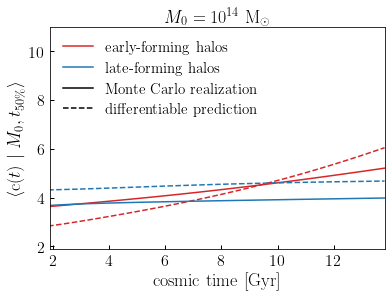

In [10]:
fig, ax = plt.subplots(1, 1)
xlim = ax.set_xlim(1.9, 13.8)
ylim = ax.set_ylim(1.9, 11)


__=ax.plot(tarr, 10**avg_log_conc_p50_mc_dpp0, color=mred)
__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[0, :], '--', color=mred)

__=ax.plot(tarr, 10**avg_log_conc_p50_mc_dpp1, color=mblue)
__=ax.plot(tarr, 10**avg_log_conc_p50_dpp[-1, :], '--', color=mblue)

from matplotlib import lines as mlines
red_solid=mlines.Line2D([],[],ls='-',c=mred,label=r'${\rm early}$-${\rm forming\ halos}$')
blue_solid=mlines.Line2D([],[],ls='-',c=mblue,label=r'${\rm late}$-${\rm forming\ halos}$')
black_solid=mlines.Line2D([],[],ls='-',c='k',label=r'${\rm Monte\ Carlo\ realization}$')
black_dashed=mlines.Line2D([],[],ls='--',c='k',label=r'${\rm differentiable\ prediction}$')

leg=ax.legend(handles=[red_solid, blue_solid, black_solid, black_dashed], loc='upper left')

xlabel = ax.set_xlabel(r'${\rm cosmic\ time\ [Gyr]}$')
ylabel = ax.set_ylabel(r'$\langle {\rm c}(t)\ \vert\ M_0, t_{50\%}\rangle$')
title = ax.set_title(r'$M_0=10^{14}\ {\rm M_{\odot}}$')
